In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from scipy.stats import skew

In [78]:
data = np.loadtxt('traindata.txt')
test_data = np.loadtxt('testinputs.txt')

In [79]:
X_train_d = data[:, :-1] 
Y_train_d = data[:, -1]   

X_test = test_data[:, :-1] 
Y_test = test_data[:, -1]

In [80]:
X_train_d, Y_train_d = shuffle(X_train_d, Y_train_d, random_state=10)

In [82]:
X_train_d.shape

(926, 8)

In [83]:
Y_train_d = Y_train_d.reshape((926,1))

In [84]:
Y_train_d.shape

(926, 1)

In [85]:
data = np.concatenate((X_train_d, Y_train_d), axis=1) 

Correlation with truth value:
truth_value    1.000000
feature_0      0.497978
feature_4      0.377596
feature_7      0.336370
feature_1      0.114815
feature_2     -0.098339
feature_6     -0.151589
feature_5     -0.159801
feature_3     -0.301525
Name: truth_value, dtype: float64


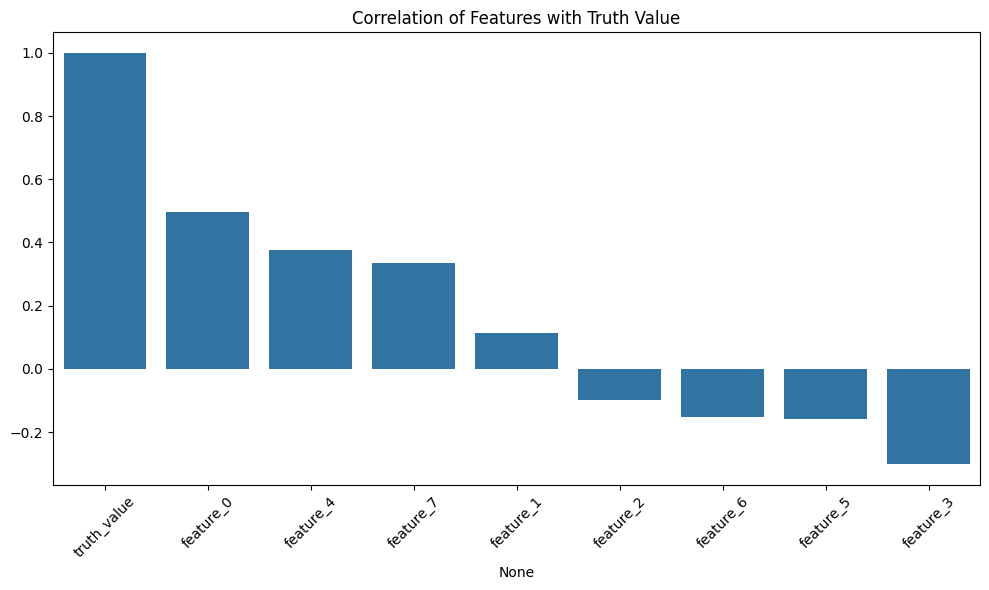

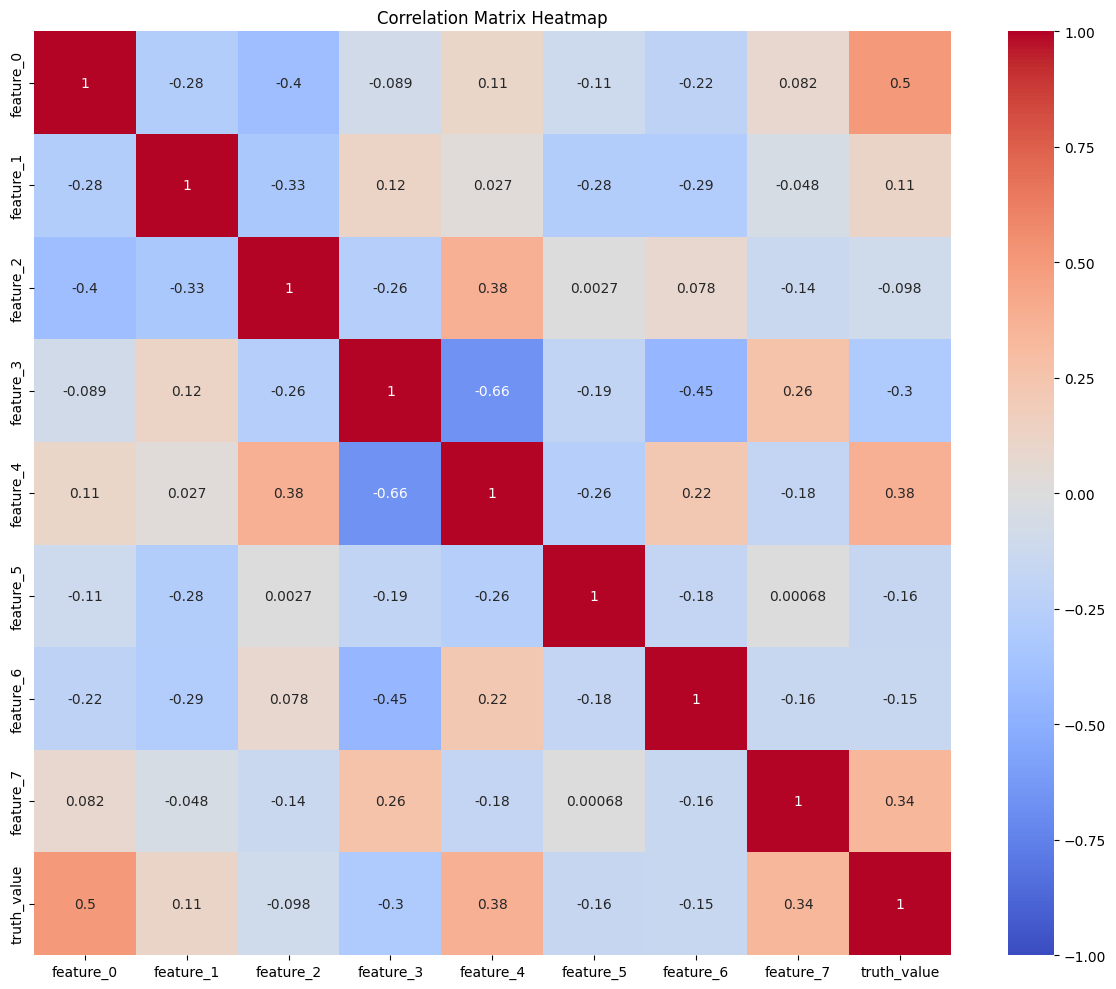

In [86]:
columns = [f'feature_{i}' for i in range(8)] + ['truth_value']
df = pd.DataFrame(data, columns=columns)

# Calculate correlation with truth value
correlation_with_truth = df.corr()['truth_value'].sort_values(ascending=False)

print("Correlation with truth value:")
print(correlation_with_truth)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_truth.index, y=correlation_with_truth.values)
plt.title('Correlation of Features with Truth Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [87]:
def feature_engeneering(X_train_d):
    X_train_df = [None] * len(X_train_d) 

    for data in range (0, len(X_train_d)):
        logs = []
        poly = []
        sin = []
        cos = []
        tan = []
        for i in X_train_d[data]:
            if i == 0:
                logs.append(0)
            else:
                logs.append(np.log(1+i))            
            poly.append(i**2) 
            poly.append(i**3) 
            sin.append(np.sin(i))
            cos.append(np.cos(i))
            tan.append(np.tan(i))
        logs = np.array(logs, dtype=float)
        poly = np.array(poly, dtype=float)
        sin = np.array(sin, dtype=float)
        cos = np.array(cos, dtype=float)
        tan = np.array(tan, dtype=float)
        mean = np.mean(X_train_d[data])
        mean_array = np.full_like(X_train_d[data], mean, dtype=float)


        X_train_df[data] = np.concatenate([X_train_d[data], logs[[0,4,7,3]], sin[[7]], cos[[4]]])
        
    return np.array(X_train_df)

In [88]:
X_train_df = feature_engeneering(X_train_d)

In [89]:
data = np.concatenate((X_train_df, Y_train_d), axis=1) 

Correlation with truth value:
truth_value    1.000000
feature_10     0.558469
feature_0      0.497978
feature_8      0.492903
feature_4      0.377596
feature_9      0.348176
feature_7      0.336370
feature_1      0.114815
feature_2     -0.098339
feature_6     -0.151589
feature_5     -0.159801
feature_13    -0.218859
feature_3     -0.301525
feature_12    -0.301852
feature_11    -0.317311
Name: truth_value, dtype: float64


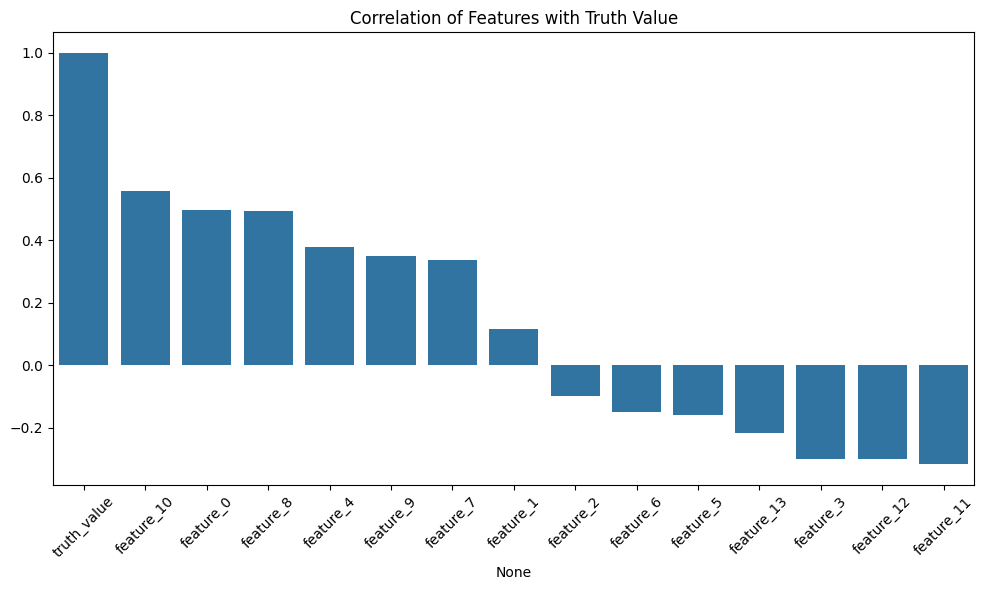

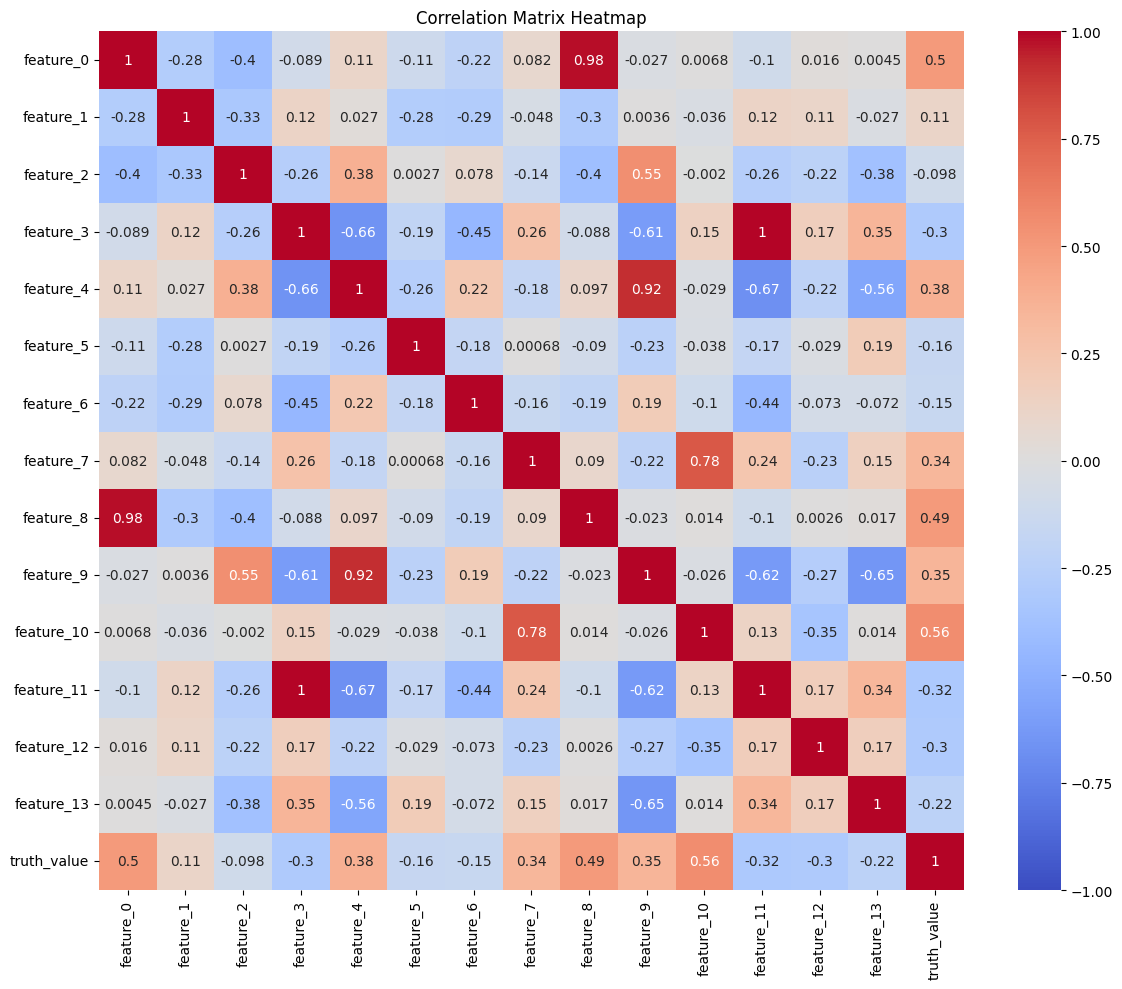

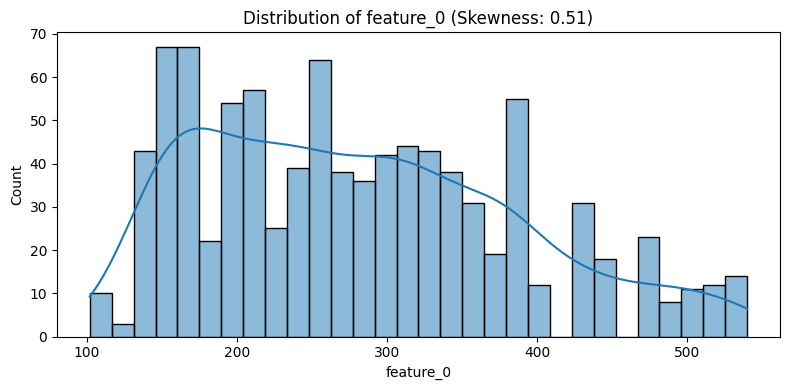

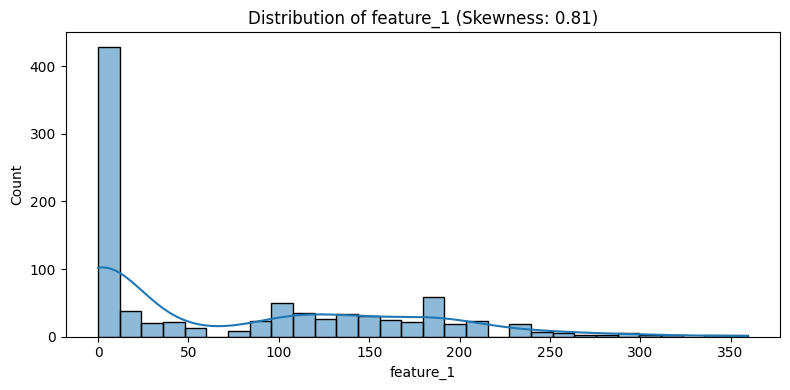

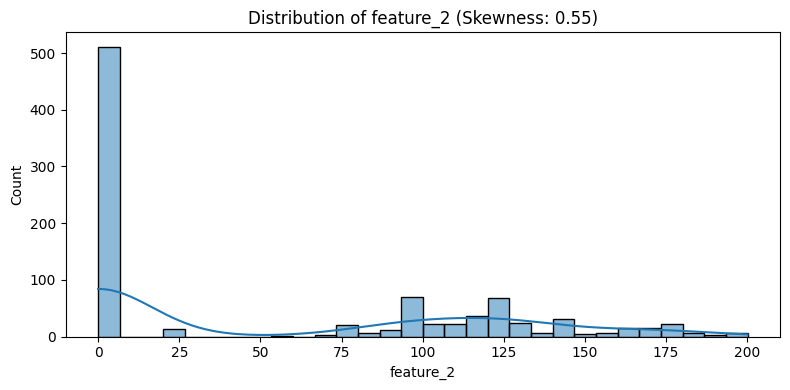

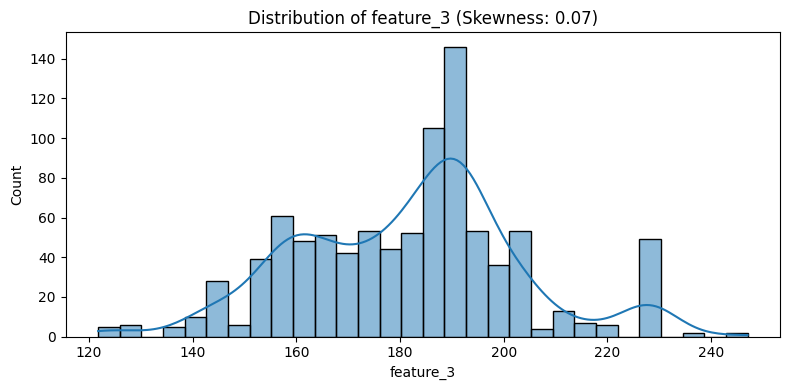

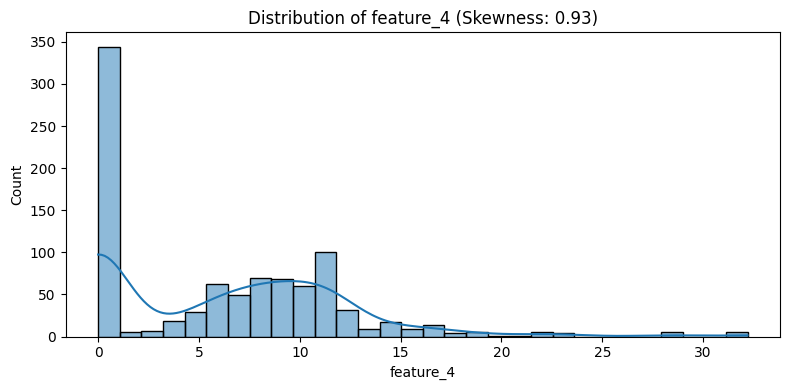

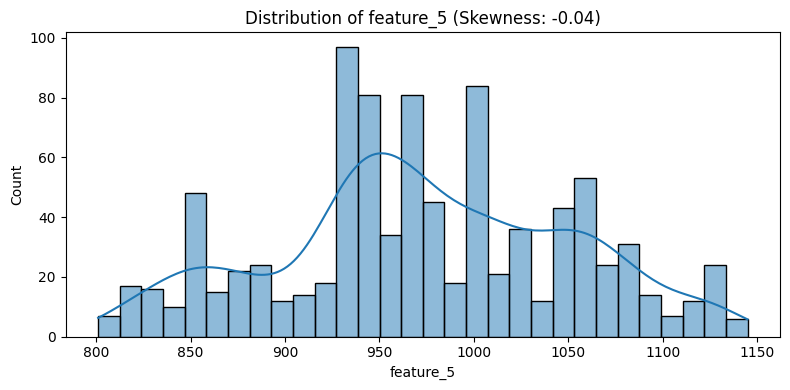

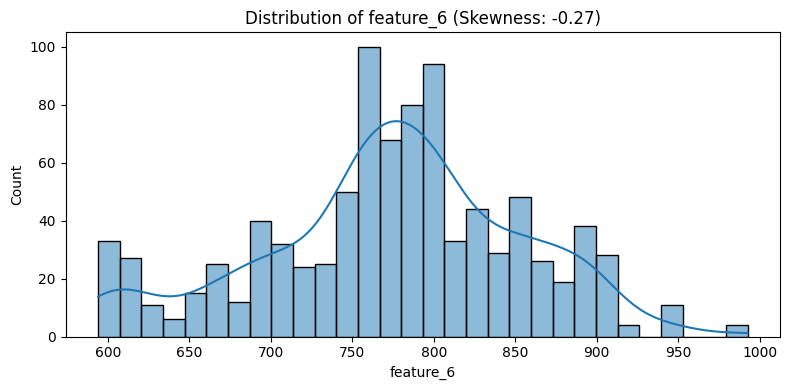

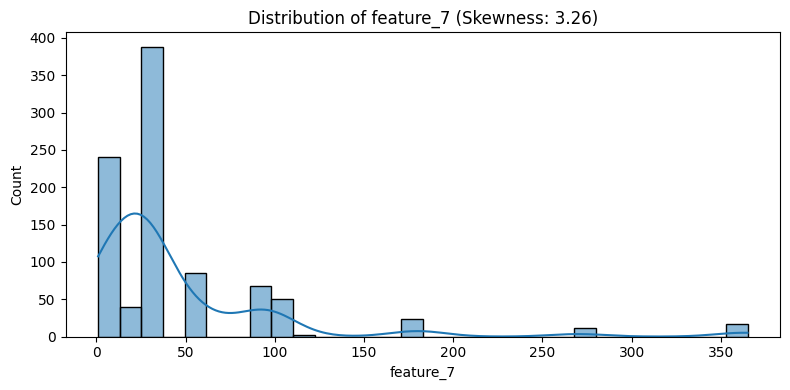

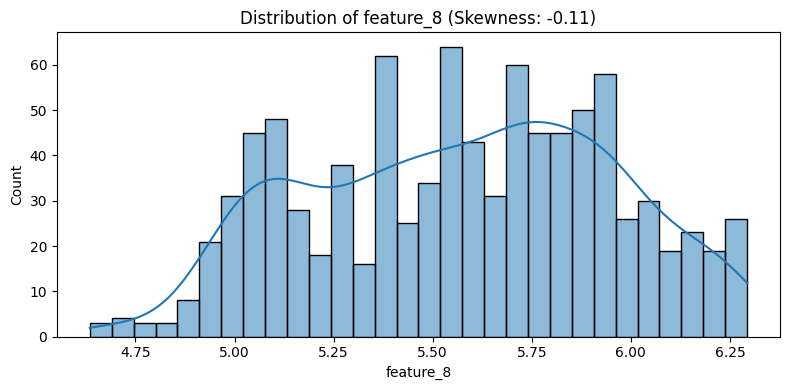

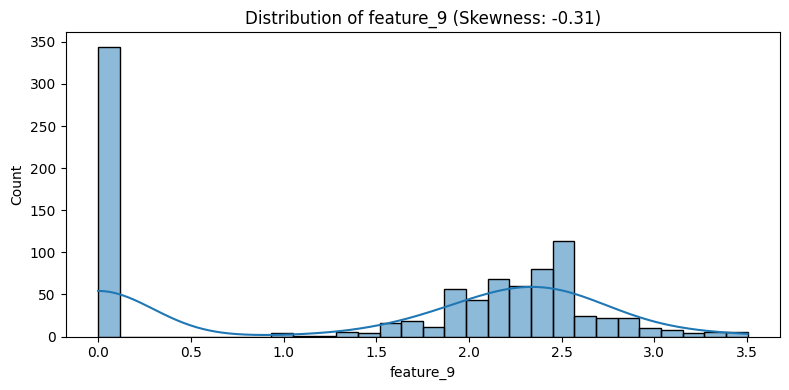

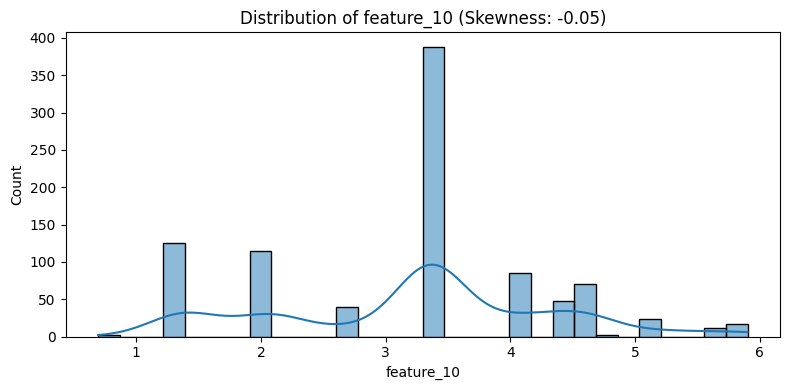

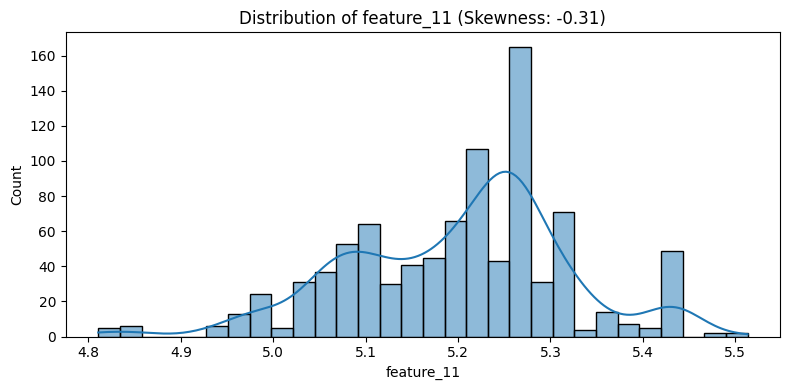

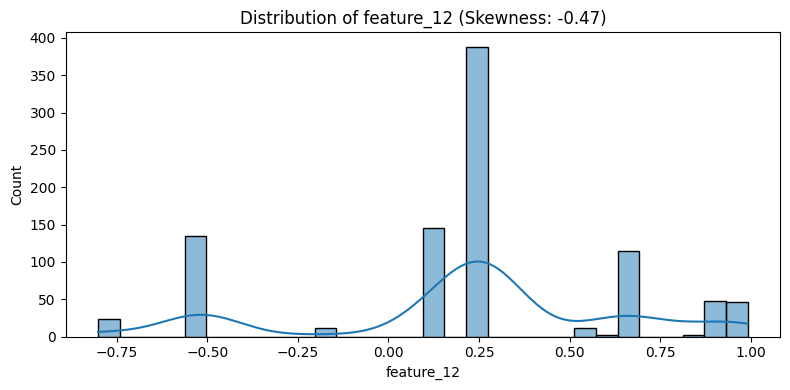

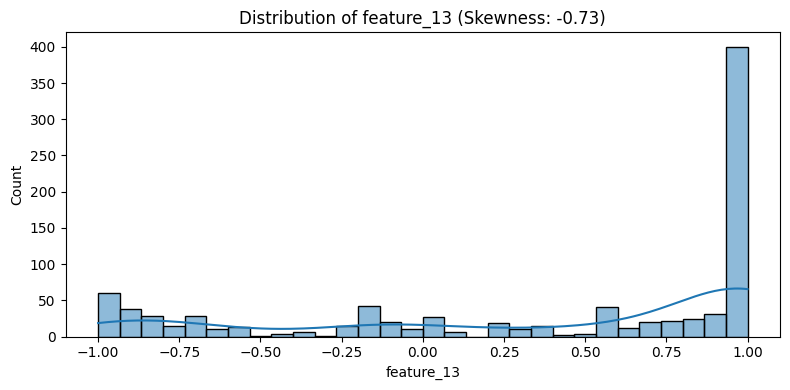

In [90]:
columns = [f'feature_{i}' for i in range(len(X_train_df[0]-1))] + ['truth_value']
df = pd.DataFrame(data, columns=columns)

# Calculate correlation with truth value
correlation_with_truth = df.corr()['truth_value'].sort_values(ascending=False)

print("Correlation with truth value:")
print(correlation_with_truth)

# Visualize correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_truth.index, y=correlation_with_truth.values)
plt.title('Correlation of Features with Truth Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


# Plot the skewness for each feature
for feature in df.columns[:-1]:  # Exclude the truth_value column
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    skewness = skew(df[feature].dropna())  # Calculate skewness
    plt.title(f'Distribution of {feature} (Skewness: {skewness:.2f})')
    plt.tight_layout()
    plt.show()

# 